# Análise Exploratória de Dados (EDA) - Heart Disease Cleveland

> **Fase 1 - Time 7**

Este notebook reúne análises, consolidando a exploração do dataset `heart_cleveland_upload.csv`.

**Estrutura do notebook:**
1. Introdução e descrição das variáveis
2. Carregamento e checagem inicial dos dados
3. Análise univariada
4. Análise bivariada
5. Testes de associação
6. Análises especiais (subgrupos, se relevante)
7. Conclusão e próximos passos

## 1. Introdução e Descrição das Variáveis

O objetivo deste estudo é analisar fatores associados à presença de doença cardíaca, utilizando o dataset Cleveland Heart Disease. A seguir, uma breve descrição das principais variáveis:

**Variáveis Clínicas**
- **age**: Idade do paciente
- **sex**: Sexo (1 = masculino; 0 = feminino)
- **cp**: Tipo de dor no peito relatada pelo paciente (0-3)
    * 0: Angina típica
    * 1: Angina atípica  
    * 2: Dor não anginosa 
    * 3: Assintomático 

**Variáveis de Teste de Esforço**
- **thalach**: Frequência cardíaca máxima atingida
- **exang**: Angina induzida por exercício (1 = sim; 0 = não)
- **oldpeak**: Depressão do segmento ST induzida por exercício
- **slope**: Inclinação do segmento ST (0-2)
    * 0: Ascendente
    * 1: Plana
    * 2: Descendente  

**Variáveis de Imagem e Anatomia**
- **ca**: Número de vasos principais coloridos por fluoroscopia (0-3)
- **thal**: 0 = normal; 1 = defeito fixo; 2 = defeito reversível

**Outras Variáveis de Risco**
- **trestbps**: Pressão arterial em repouso
- **chol**: Colesterol sérico em mg/dl
- **fbs**: Glicemia em jejum > 120 mg/dl (1 = sim; 0 = não)
- **restecg**: Resultados do eletrocardiograma em repouso (0-2)
    * 0: Normal
    * 1: Anormalidade ST-T
    * 2: Hipertrofia ventricular esquerda

**Variável Target**
- **condition**: Presença de doença cardíaca (1 = sim; 0 = não)

Essas variáveis incluem dados quantitativos e qualitativos, relevantes para a avaliação clínica do paciente.

## 2. Carregamentos e checagem inicial dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub
import shutil
import os

print("Baixando dataset via KaggleHub...")

# 1. Baixa para o cache temporário do sistema
path_cache = kagglehub.dataset_download("cherngs/heart-disease-cleveland-uci")

# 2. Define onde você quer guardar
pasta_destino = "../data/heart-disease-cleveland-uci"
os.makedirs(pasta_destino, exist_ok=True)

print(f"Movendo arquivo para: {pasta_destino}")
# 3. Copia os arquivos do cache para a pasta (/data)
# Lista todos os arquivos baixados e copia um por um
for arquivo in os.listdir(path_cache):
    caminho_origem = os.path.join(path_cache, arquivo)
    caminho_final = os.path.join(pasta_destino, arquivo)
    
    # Copia (e substitui se já existir para garantir atualização)
    if os.path.isfile(caminho_origem):
        shutil.copy2(caminho_origem, caminho_final)
        print(f"✅ Arquivo salvo: {arquivo}")

print("Download e organização concluídos!")

Baixando dataset via KaggleHub...
Movendo arquivo para: ../data/heart-disease-cleveland-uci
✅ Arquivo salvo: heart_cleveland_upload.csv
Download e organização concluídos!


In [3]:
df = pd.read_csv(os.path.join(pasta_destino, "heart_cleveland_upload.csv"))

In [4]:
df.shape

(297, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [8]:
df.duplicated().sum()

np.int64(0)

## 3. Análise Univariada

Nesta etapa, analisamos a distribuição de cada variável individualmente, utilizando estatísticas descritivas e visualizações.

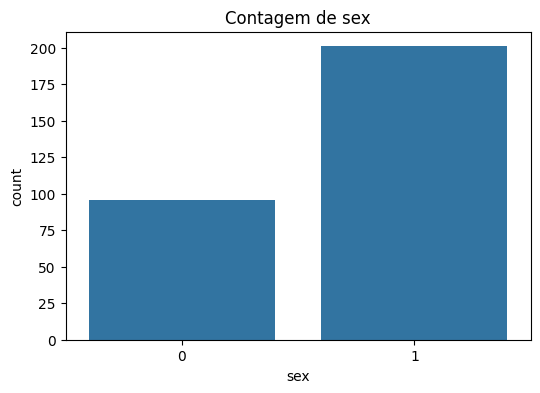

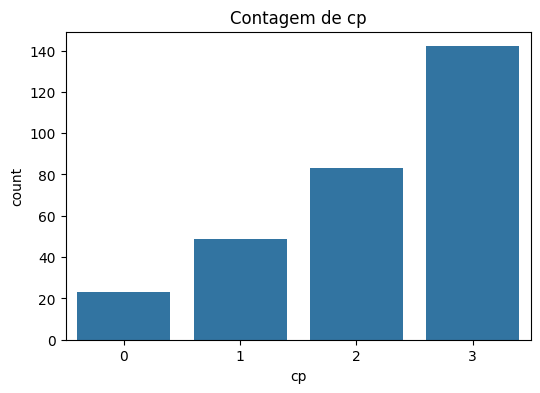

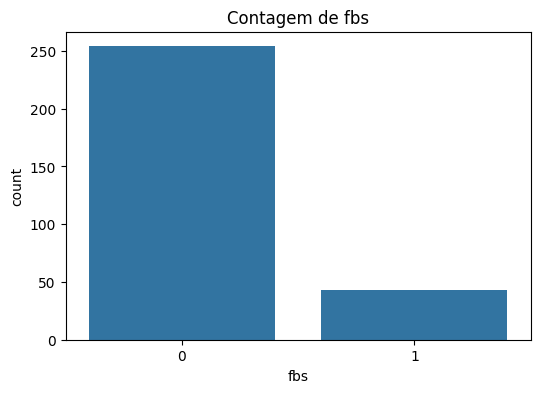

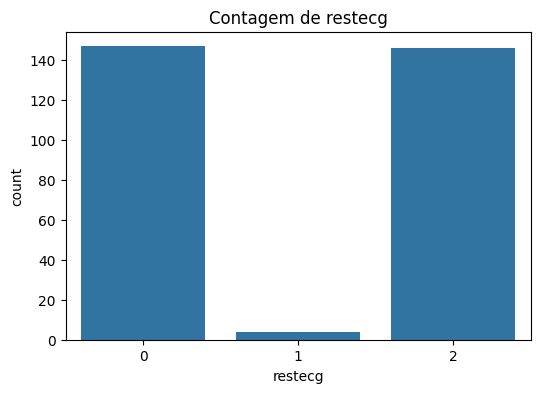

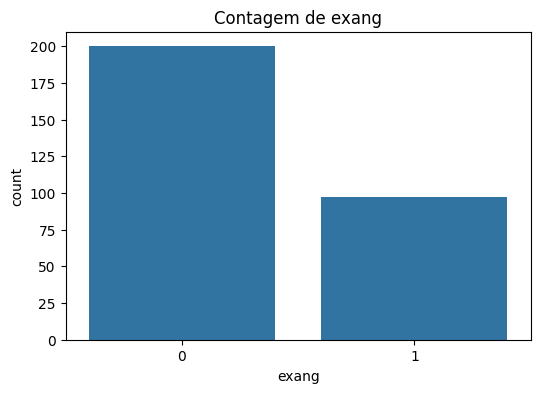

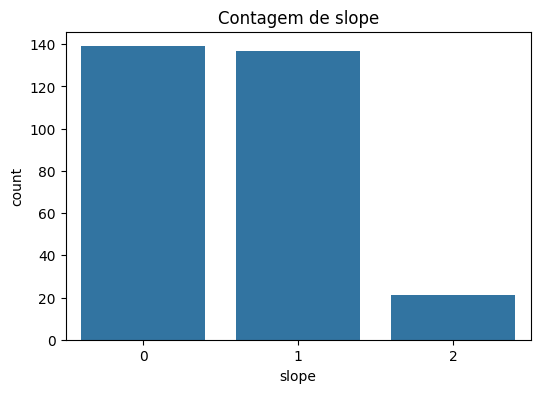

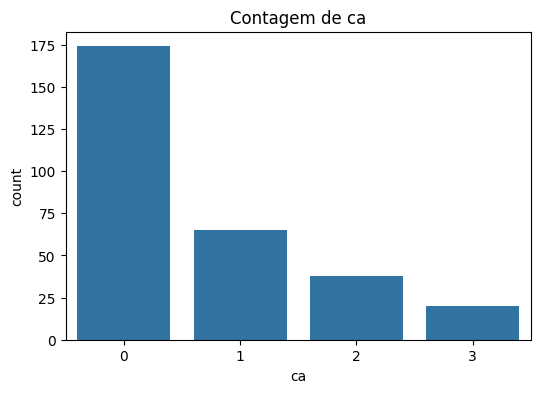

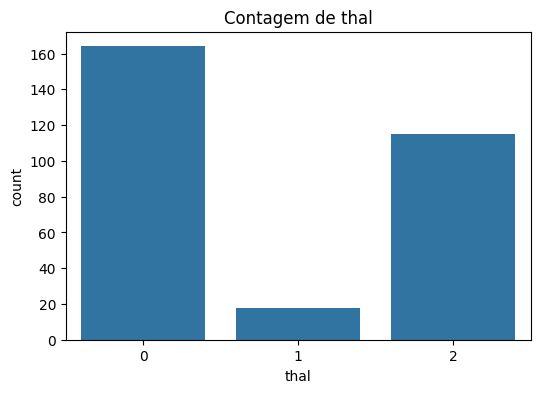

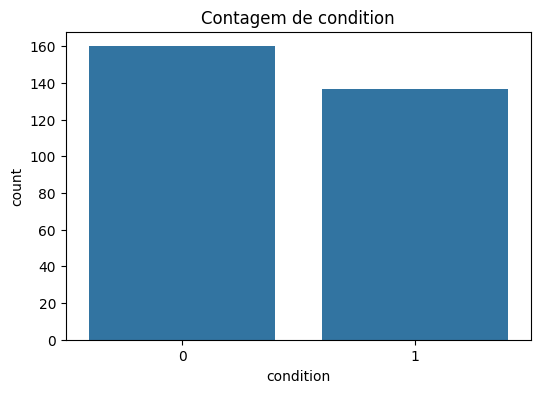

In [9]:
# Variáveis categóricas
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Contagem de {col}')
    plt.show()

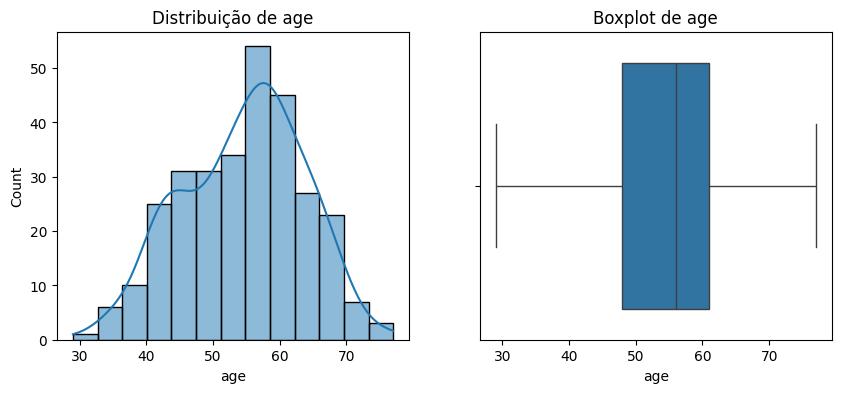

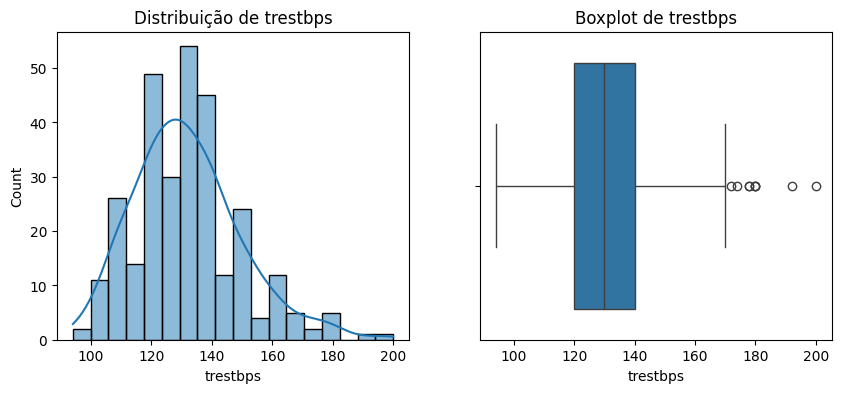

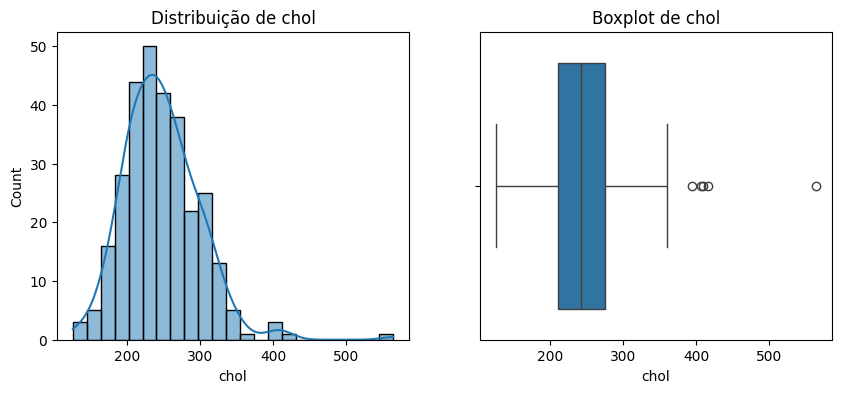

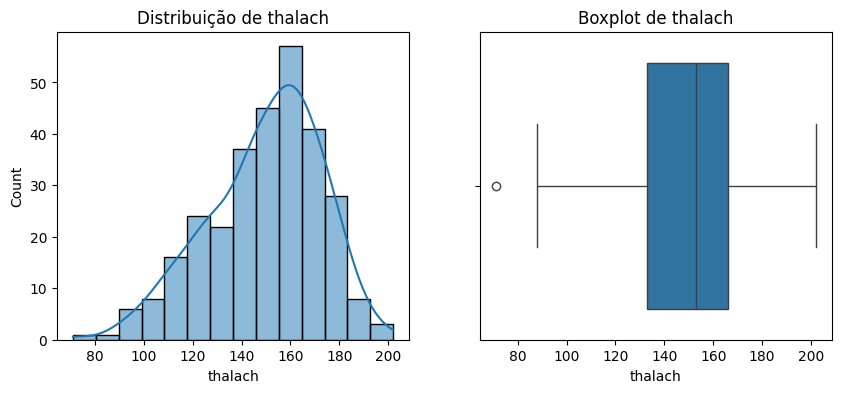

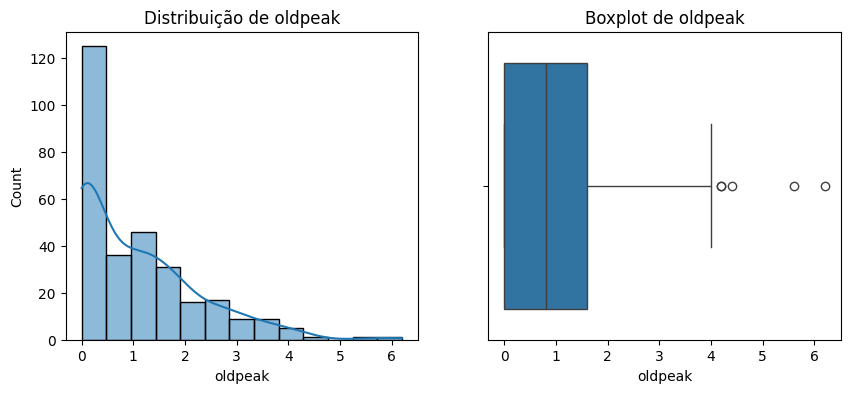

In [10]:
# Variáveis numéricas
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Após analisar individualmente as variáveis, destacamos os seguintes padrões fundamentais para a modelagem:

**1. Perfil Demográfico:**
* **Idade (`age`):** A distribuição é bimodal (picos próximos aos 45 e 58 anos), sugerindo dois grupos distintos de pacientes. A leve assimetria à direita indica uma predominância de pacientes mais jovens no estudo.
* **Sexo (`sex`):** Há uma predominância masculina no dataset (aprox. 67% dos pacientes).

**2. Sinais Vitais e Exames Laboratoriais:**
* **Colesterol (`chol`) e Pressão (`trestbps`):** Seguem distribuições próximas à normalidade, com alguns outliers que representam casos clínicos extremos, mas plausíveis.
* **Glicemia (`fbs`):** A vasta maioria dos pacientes não apresenta glicemia de jejum elevada (>120 mg/dl), o que torna essa variável menos discriminativa isoladamente.

**3. Sintomatologia e Angina:**
* **Tipo de Dor (`cp`):** A maioria dos pacientes foi classificada como "Assintomática" ou com "Dor Não Anginosa". Isso reforça a importância do modelo de IA, pois a triagem baseada apenas na queixa de dor típica falharia em detectar grande parte desse grupo.
* **Angina no Exercício (`exang`):** Cerca de 67% dos pacientes **não** sentiram dor durante o teste de esforço, mesmo aqueles que podem ter a doença.

**4. Indicadores de Estresse Cardíaco (Cruciais para o Modelo):**
* **Frequência Cardíaca Máxima (`thalach`):** Apresenta assimetria negativa. Os valores baixos (cauda esquerda) não são erros, mas sim pacientes que interromperam o teste precocemente por exaustão ou sintomas, sendo fortes indicativos de risco.
* **Depressão do Segmento ST (`oldpeak`):** Distribuição com forte assimetria positiva. A maioria concentra-se em zero, mas a cauda longa à direita identifica pacientes com isquemia severa.
* **Inclinação (`slope`) e Vasos (`ca`):** A presença de *Slope Flat* ou *Downsloping*, bem como qualquer número de vasos coloridos (`ca > 0`), são marcadores clínicos fortes que apareceram em uma parcela significativa da amostra.

**5. Variável Alvo (`condition`):**
* **Balanceamento:** O dataset apresenta um equilíbrio quase perfeito entre saudáveis e doentes. Isso elimina a necessidade de técnicas complexas de reamostragem (como SMOTE) e garante que a acurácia será uma métrica confiável.

> **✅ Decisão Metodológica:** **Observamos *outliers* estatísticos em variáveis como `thalach` e `oldpeak`. Porém, no contexto cardiológico, estes pontos representam a fisiologia de pacientes doentes (baixa capacidade funcional). Portanto, optamos por **não remover outliers**, preservando a realidade clínica para o aprendizado do modelo. -- VALIDAR** 

## 4. Análise Bivariada

Aqui, exploramos as relações entre as variáveis independentes e o desfecho (target), utilizando gráficos e testes estatísticos.

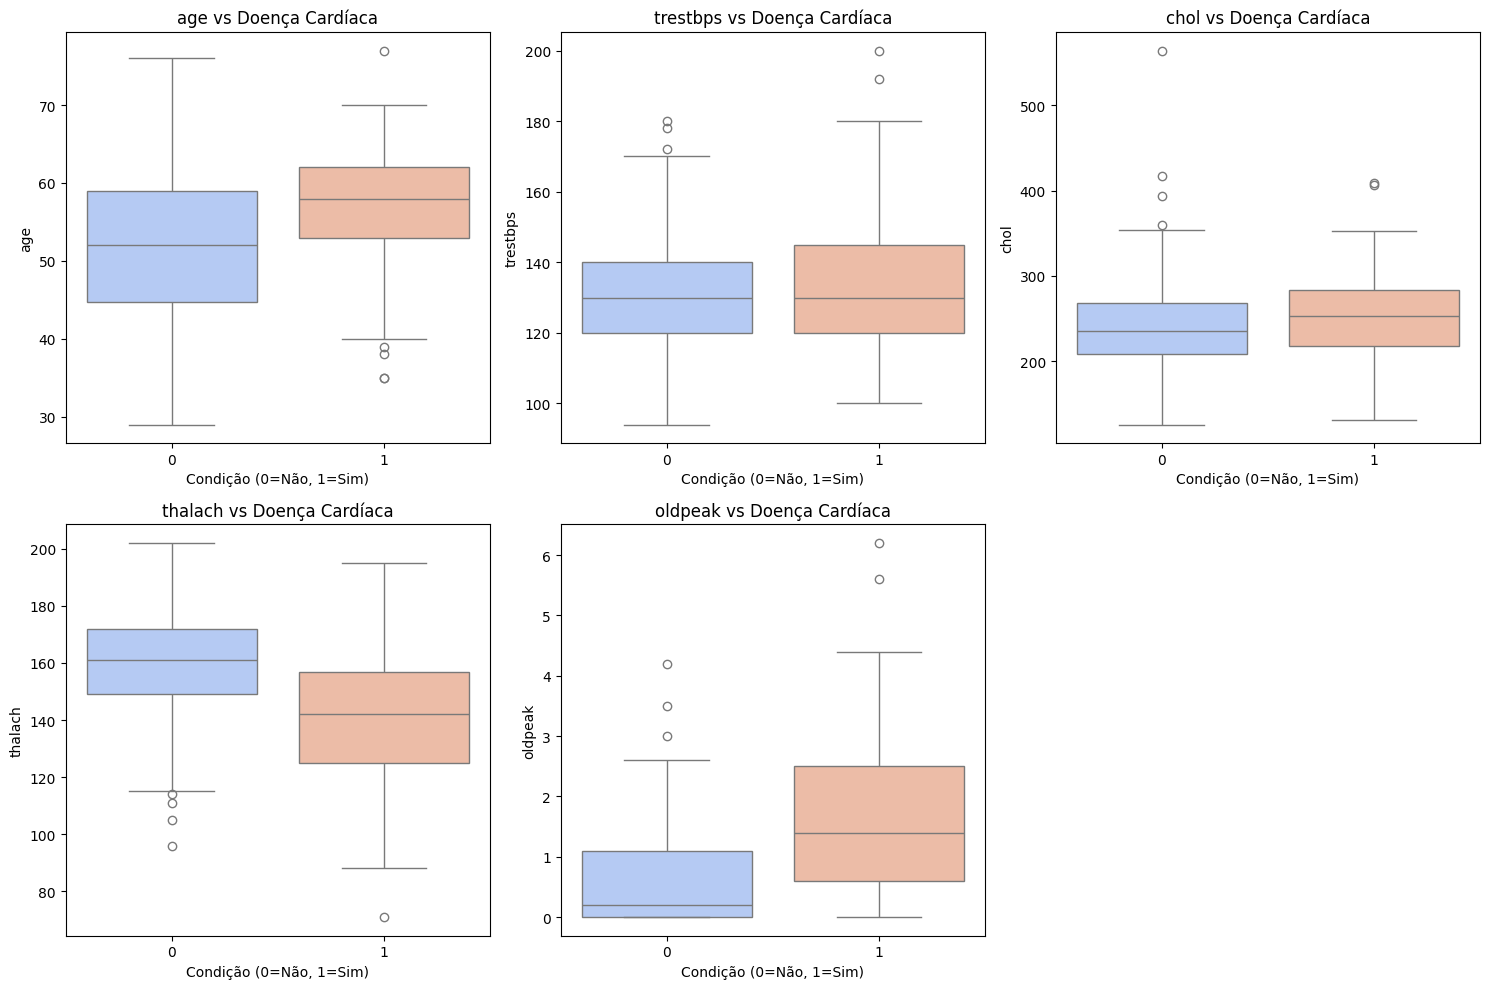

In [11]:
# Lista de variáveis numéricas importantes para comparar com o alvo
# num_cols = ['age', 'thalach', 'oldpeak', 'chol', 'trestbps']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    # Boxplot comparando Saudáveis (0) vs Doentes (1)
    sns.boxplot(x='condition', y=col, data=df, palette='coolwarm', hue='condition', legend=False)
    plt.title(f'{col} vs Doença Cardíaca')
    plt.xlabel('Condição (0=Não, 1=Sim)')

plt.tight_layout()
plt.show()

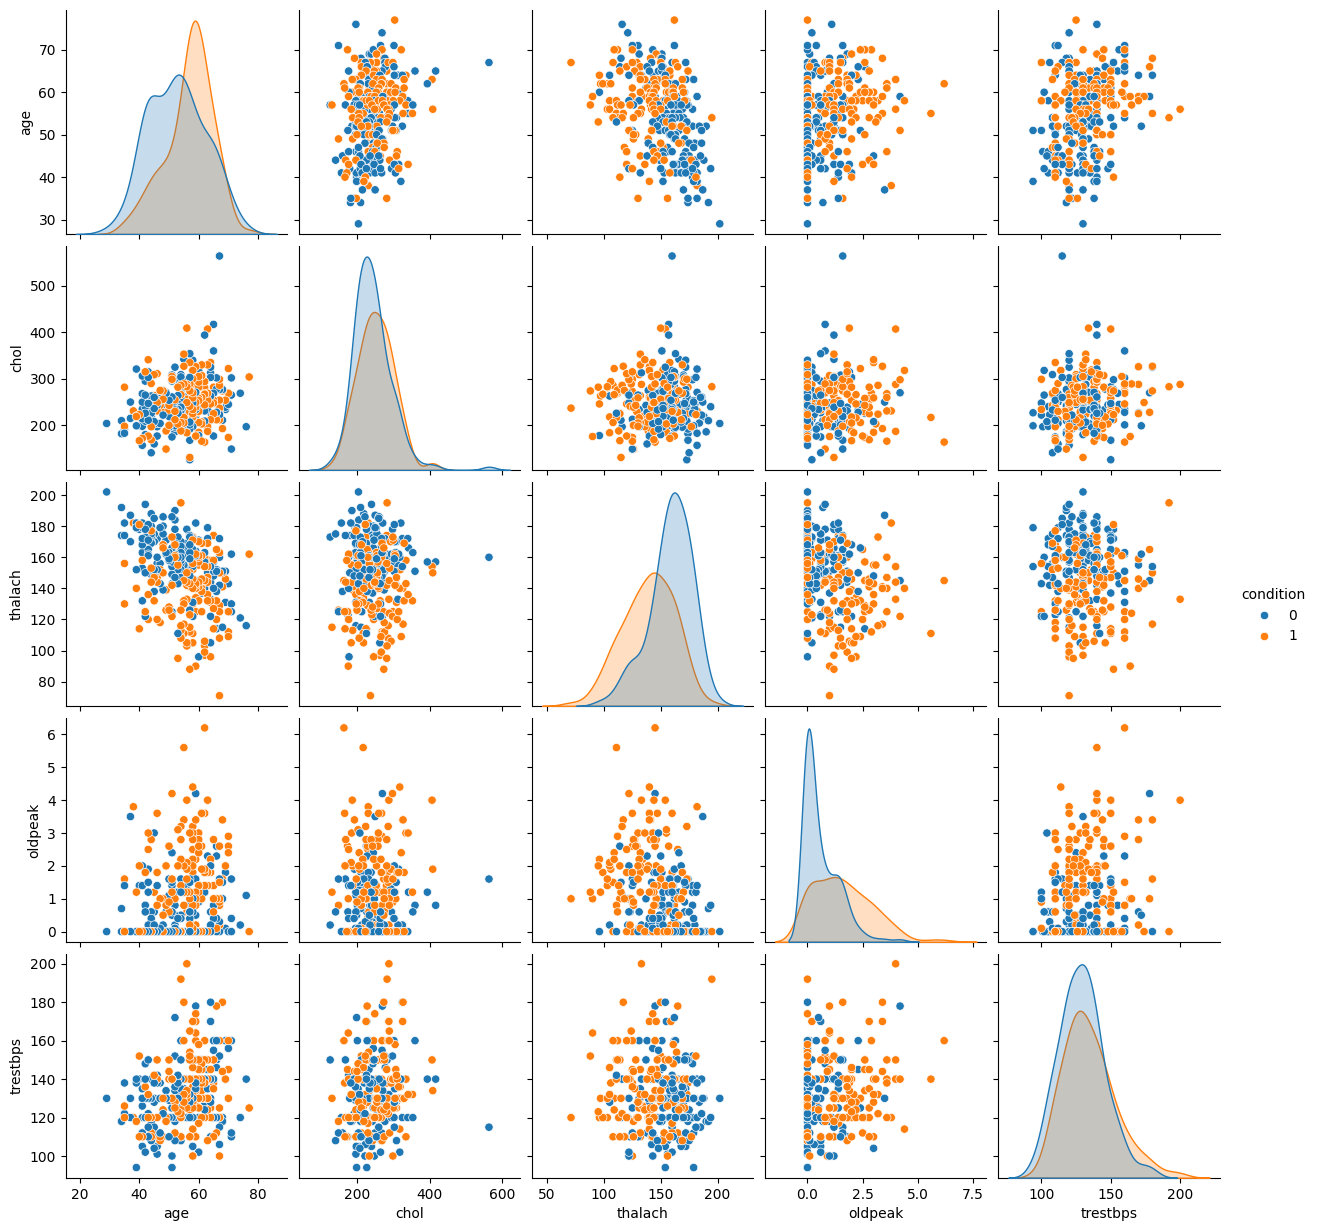

In [12]:
sns.pairplot(df, vars=["age", "chol", "thalach", "oldpeak", "trestbps"], hue="condition")

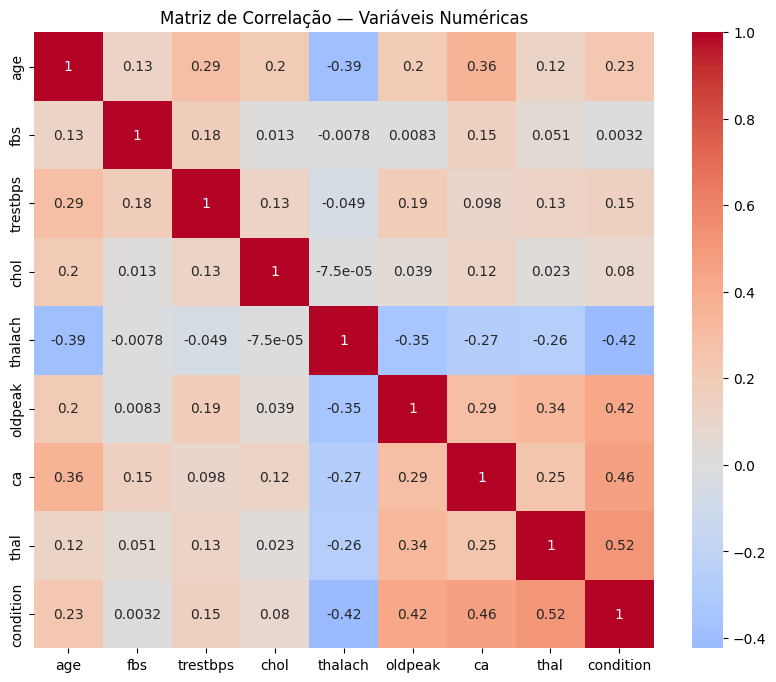

In [13]:
# Matriz de correlação para variáveis numéricas
num_vars = ["age", "fbs", "trestbps", "chol", "thalach", "oldpeak", "ca", "thal", "condition"]

plt.figure(figsize=(10, 8))
sns.heatmap(
    df[num_vars].corr(),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Matriz de Correlação — Variáveis Numéricas")
plt.show()


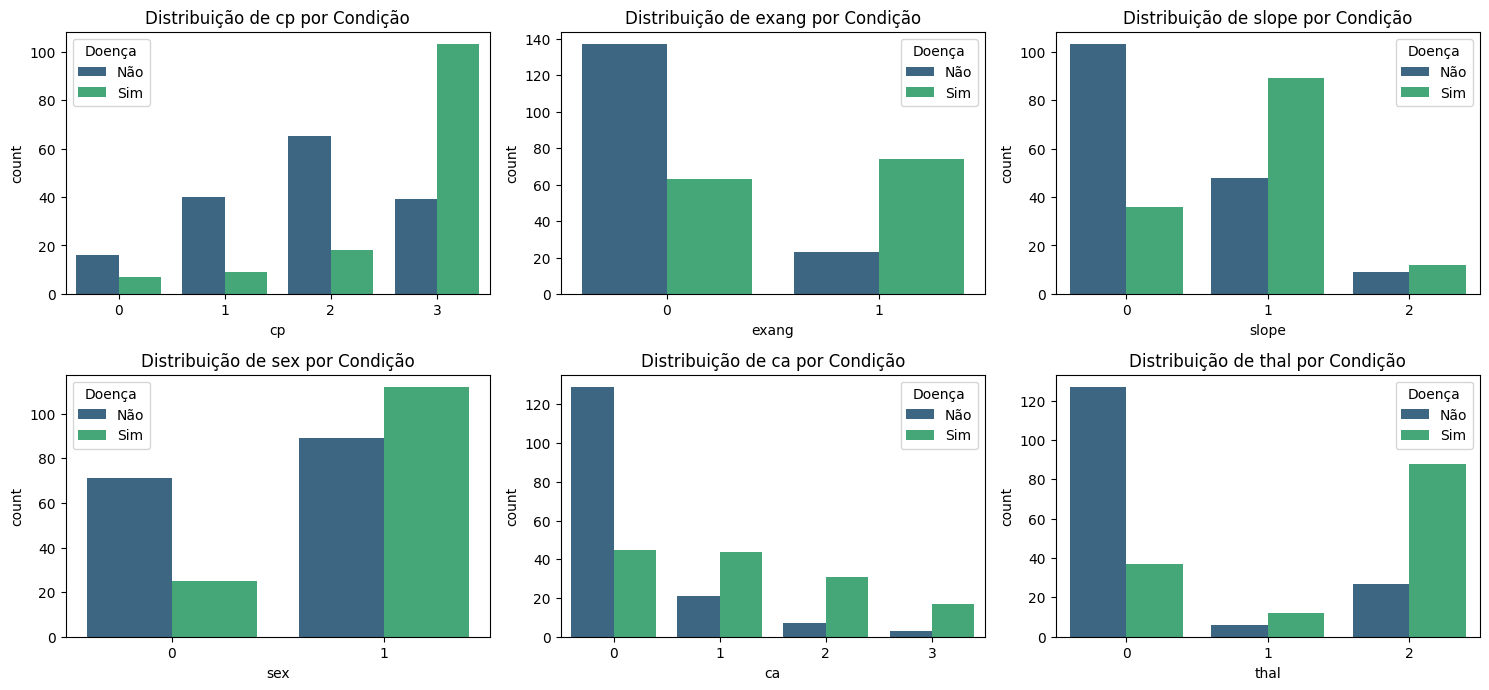

In [14]:
# Variáveis categóricas chave
cat_vars = ['cp', 'exang', 'slope', 'sex', 'ca', 'thal']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_vars): 
    plt.subplot(3, 3, i+1)
    # Countplot com 'hue' mostra a proporção de doentes em cada categoria
    sns.countplot(x=col, hue='condition', data=df, palette='viridis')
    plt.title(f'Distribuição de {col} por Condição')
    plt.legend(title='Doença', labels=['Não', 'Sim'])

plt.tight_layout()
plt.show()

Análise Detalhada de Variáveis Críticas:


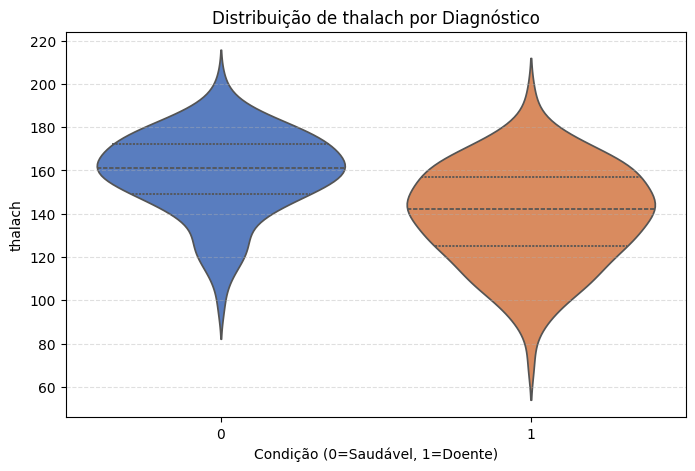

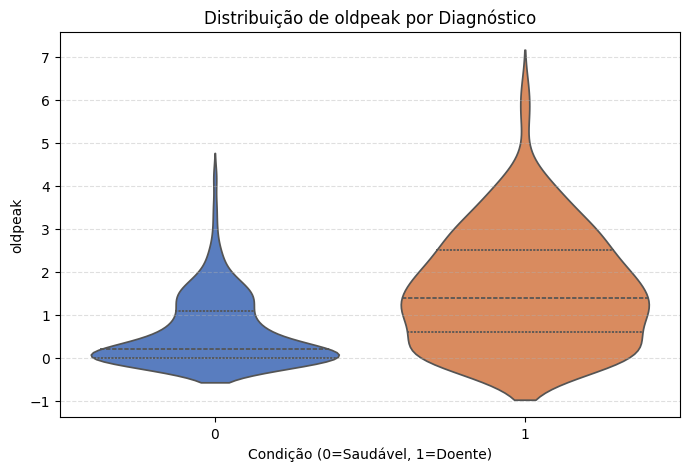

In [15]:
def plot_violin_by_condition(df, var_name, target_var='condition'):
    """Gera um gráfico de violino comparativo."""
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=target_var, y=var_name, data=df, palette="muted", inner="quartile", hue=target_var, legend=False)
    plt.title(f'Distribuição de {var_name} por Diagnóstico')
    plt.xlabel('Condição (0=Saudável, 1=Doente)')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

# Exemplo de uso nas variáveis mais críticas
print("Análise Detalhada de Variáveis Críticas:")
plot_violin_by_condition(df, 'thalach') # Freq Cardíaca
plot_violin_by_condition(df, 'oldpeak') # Depressão ST

In [16]:
# Validação do "Paradoxo da Dor" (Porcentagem de Doentes por Tipo de Dor)
print("\n - QUEM É O GRUPO DE RISCO NA DOR NO PEITO (CP)?")
# Cria uma tabela cruzada e calcula a % de doentes em cada tipo
paradoxo_cp = pd.crosstab(df['cp'], df['condition'], normalize='index') * 100
paradoxo_cp.columns = ['Saudável (%)', 'Doente (%)']
display(paradoxo_cp)

# Validação da Angina no Exercício
print("\n - QUEM SENTE DOR NO EXERCÍCIO TEM DOENÇA?")
exang_risk = pd.crosstab(df['exang'], df['condition'], normalize='index') * 100
exang_risk.columns = ['Saudável (%)', 'Doente (%)']
display(exang_risk)


 - QUEM É O GRUPO DE RISCO NA DOR NO PEITO (CP)?


,Saudável (%),Doente (%)
cp,,
0,69.565217,30.434783
1,81.632653,18.367347
2,78.313253,21.686747
3,27.464789,72.535211



 - QUEM SENTE DOR NO EXERCÍCIO TEM DOENÇA?


,Saudável (%),Doente (%)
exang,,
0,68.50000,31.50000
1,23.71134,76.28866


A análise conjunta das variáveis revelou padrões clínicos consistentes que diferenciam pacientes saudáveis (`condition=0`) de pacientes com doença cardíaca (`condition=1`).

**1. Sinais Vitais Críticos (Variáveis Numéricas):**
* **Frequência Cardíaca Máxima (`thalach`):** Identificamos uma **correlação negativa forte**. Pacientes doentes apresentam média significativamente menor (~139 bpm) comparada aos saudáveis (~158 bpm). Isso indica que o coração comprometido não consegue atingir altas frequências durante o estresse.
* **Depressão do Segmento ST (`oldpeak`):** É o **discriminador numérico mais potente**. Enquanto a mediana dos saudáveis é próxima a 0, os doentes apresentam valores elevados, confirmando a isquemia induzida por esforço como marcador chave.
* **Idade (`age`):** Embora exista uma tendência linear (pessoas mais velhas têm maior risco), a sobreposição entre as caixas dos boxplots sugere que a idade, isoladamente, não é uma sentença definitiva, dependendo mais da condição física do paciente.

**2. O Paradoxo dos Sintomas (Variáveis Categóricas):**
* **Dor no Peito (`cp`) e Angina (`exang`):** Observamos um comportamento contraintuitivo fundamental para a defesa do projeto.
    * Pacientes com `exang=1` (dor ao exercitar) têm altíssima taxa de doença.
    * Porém, a categoria `cp=3` (**Assintomático**) apresentou a maior incidência proporcional de doença.
    * **Conclusão de Negócio:** Isso valida a necessidade da nossa IA. Uma triagem humana baseada apenas na pergunta "Você sente dor?" falharia em detectar o grupo assintomático, que é justamente o de maior risco neste dataset.

**3. Evidências Físicas (Fluoroscopia e Cintilografia):**
* **Vasos (`ca`) e Talassemia (`thal`):** Estas variáveis funcionam como "prova real". A presença de vasos calcificados (`ca > 0`) ou defeitos reversíveis na talassemia (`thal=2`) quase invariavelmente aponta para a presença da doença, corroborando as altas correlações observadas na matriz.

**4. Validação Estatística (Matriz de Correlação):**
* A matriz confirmou matematicamente o que vimos visualmente: `thalach` (-0.42), `oldpeak` (0.42), `ca` (0.46) e `thal` (0.52) são as "locomotivas" do modelo. Variáveis como `fbs` (glicemia) e `chol` (colesterol) mostraram correlações fracas, indicando que, para este dataset específico de emergência, os sinais de estresse cardíaco são mais preditivos do que os exames de sangue de rotina.

---
✅ **Veredito para Modelagem:**
O dataset contém sinais fortes e separáveis. O modelo deve priorizar as variáveis de **resposta ao esforço** (`oldpeak`, `thalach`, `exang`) e **anatomia** (`ca`, `thal`) para maximizar o Recall.

## 5. Testes de Associação

Aplicação de testes estatísticos para avaliar a relação entre variáveis categóricas e o desfecho, e entre variáveis numéricas e o desfecho.

In [17]:
from scipy.stats import chi2_contingency, mannwhitneyu

print("🔬 INICIANDO BATERIA DE TESTES ESTATÍSTICOS...")
print("-" * 60)

# ==============================================================================
# 1. TESTE QUI-QUADRADO (Para Variáveis Categóricas)
# Pergunta: "A proporção de doentes muda dependendo da categoria?"
# ==============================================================================
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

results_cat = []

print("\n📊 A. Associação Categórica (Qui-Quadrado):")
print(f"{'Variável':<15} {'p-valor':<15} {'Resultado'}")
print("-" * 45)

for col in cat_features:
    # Cria tabela de contingência
    contingency = pd.crosstab(df[col], df['condition'])
    
    # Roda o teste
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    status = "✅ Significativo" if p < 0.05 else "❌ Não Relevante"
    results_cat.append({'Feature': col, 'p-value': p, 'Type': 'Categorical'})
    
    print(f"{col:<15} {p:.4e}      {status}")

# ==============================================================================
# 2. TESTE MANN-WHITNEY U (Para Variáveis Numéricas)
# Pergunta: "A distribuição dos valores é diferente entre doentes e saudáveis?"
# Escolhido Mann-Whitney ao invés de Teste-T pois 'oldpeak' não é normal.
# ==============================================================================
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print("\n📈 B. Diferença de Médias/Medianas (Mann-Whitney U):")
print(f"{'Variável':<15} {'p-valor':<15} {'Resultado'}")
print("-" * 45)

for col in num_features:
    # Separa os grupos
    group_sick = df[df['condition'] == 1][col]
    group_healthy = df[df['condition'] == 0][col]
    
    # Roda o teste
    stat, p = mannwhitneyu(group_sick, group_healthy)
    
    status = "✅ Significativo" if p < 0.05 else "❌ Não Relevante"
    results_cat.append({'Feature': col, 'p-value': p, 'Type': 'Numerical'})
    
    print(f"{col:<15} {p:.4e}      {status}")

print("-" * 60)
print("📝 NOTA: 'p-valor < 0.05' prova que a variável influencia na doença.")

🔬 INICIANDO BATERIA DE TESTES ESTATÍSTICOS...
------------------------------------------------------------

📊 A. Associação Categórica (Qui-Quadrado):
Variável        p-valor         Resultado
---------------------------------------------
sex             2.9457e-06      ✅ Significativo
cp              1.1783e-16      ✅ Significativo
fbs             1.0000e+00      ❌ Não Relevante
restecg         8.3312e-03      ✅ Significativo
exang           9.5109e-13      ✅ Significativo
slope           3.6301e-10      ✅ Significativo
ca              1.3726e-15      ✅ Significativo
thal            1.2417e-18      ✅ Significativo

📈 B. Diferença de Médias/Medianas (Mann-Whitney U):
Variável        p-valor         Resultado
---------------------------------------------
age             3.6725e-05      ✅ Significativo
trestbps        2.3460e-02      ✅ Significativo
chol            4.6689e-02      ✅ Significativo
thalach         1.6753e-13      ✅ Significativo
oldpeak         1.5386e-12      ✅ Significat

MAPAS DE CALOR DE RESÍDUOS PADRONIZADOS
Interpretação: Vermelho = Risco Aumentado | Azul = Fator de Proteção


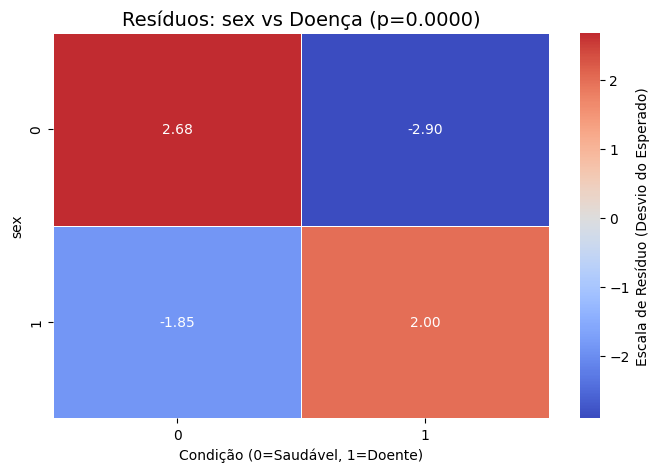

✅ Gráfico gerado para 'sex': Associação estatística forte.



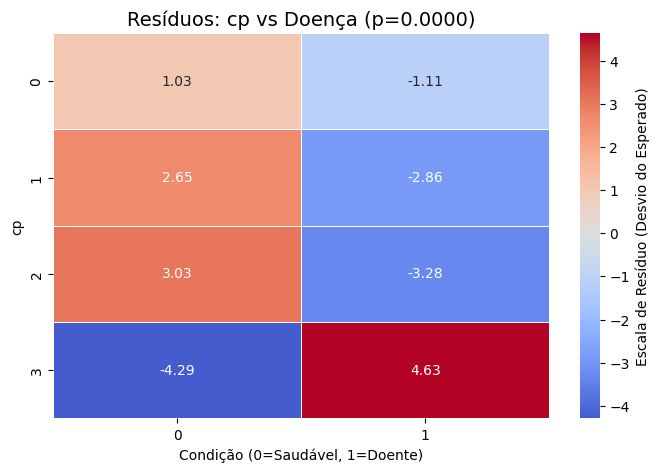

✅ Gráfico gerado para 'cp': Associação estatística forte.

⏩ Pulando 'fbs': Não tem relevância estatística (p=1.0000 > 0.05).



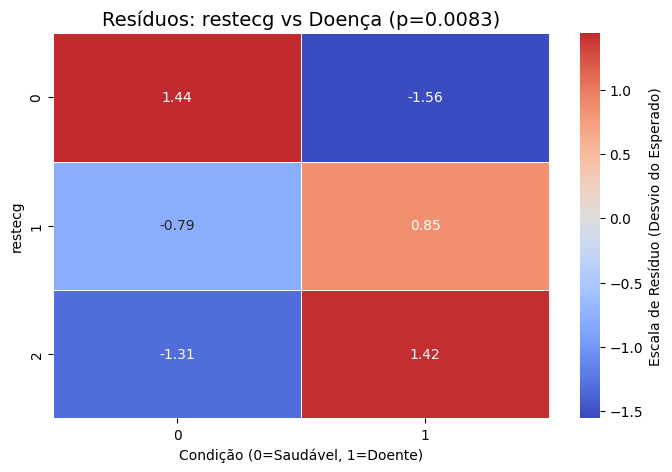

✅ Gráfico gerado para 'restecg': Associação estatística forte.



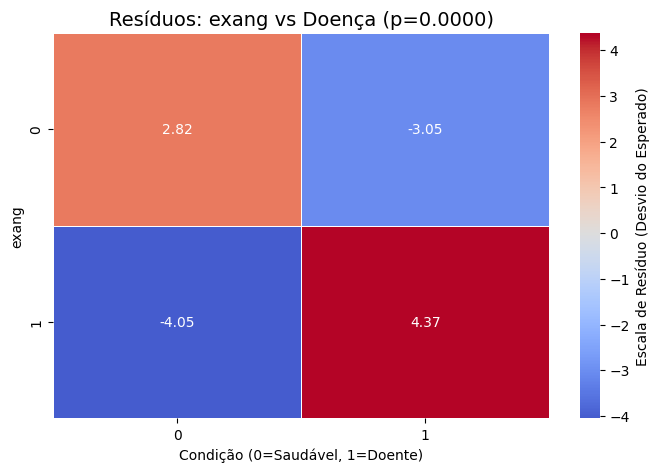

✅ Gráfico gerado para 'exang': Associação estatística forte.



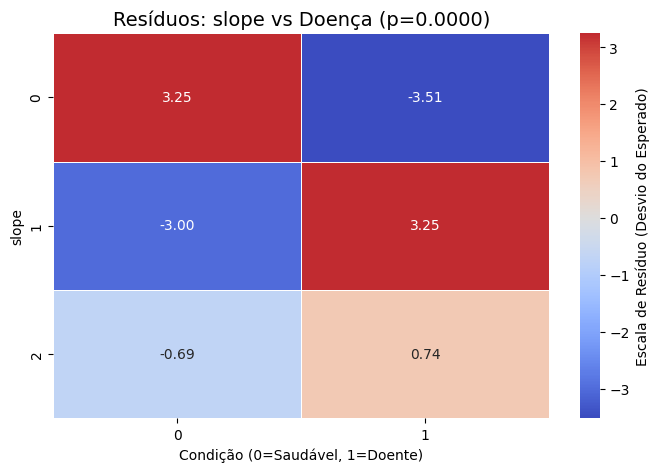

✅ Gráfico gerado para 'slope': Associação estatística forte.



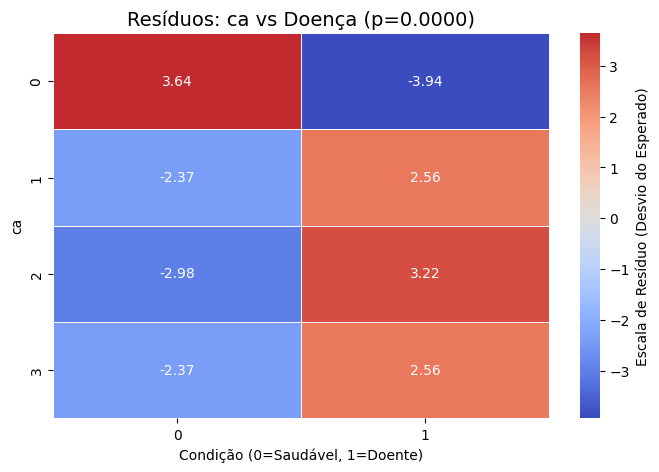

✅ Gráfico gerado para 'ca': Associação estatística forte.



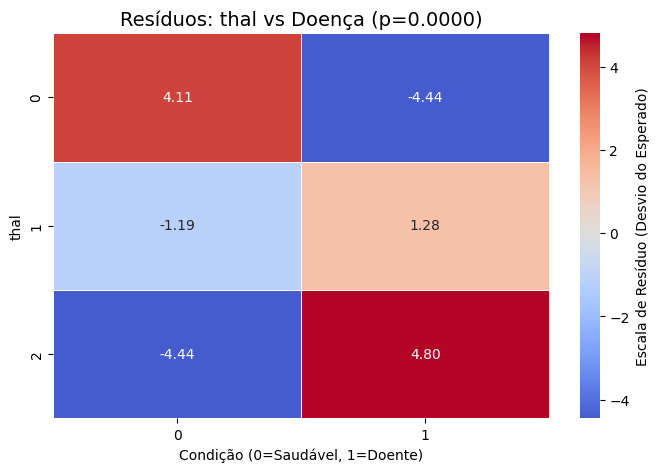

✅ Gráfico gerado para 'thal': Associação estatística forte.



In [18]:
from scipy.stats import chi2_contingency

# Variáveis categóricas que vamos investigar
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
alpha = 0.05

print("MAPAS DE CALOR DE RESÍDUOS PADRONIZADOS")
print("Interpretação: Vermelho = Risco Aumentado | Azul = Fator de Proteção")

for feature in cat_features:
    # 1. Cria a tabela de contingência
    contingency_table = pd.crosstab(df[feature], df["condition"])
    
    # 2. Roda o teste Qui-Quadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # 3. Se for significativo (tem relação com a doença), calcula e plota os resíduos
    if p < alpha:
        # Fórmula dos Resíduos Padronizados: (Observado - Esperado) / Raiz(Esperado)
        residuals = (contingency_table - expected) / np.sqrt(expected)

        plt.figure(figsize=(8, 5))
        sns.heatmap(
            residuals,
            annot=True,
            cmap="coolwarm",
            center=0,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'label': 'Escala de Resíduo (Desvio do Esperado)'}
        )
        plt.title(f"Resíduos: {feature} vs Doença (p={p:.4f})", fontsize=14)
        plt.xlabel("Condição (0=Saudável, 1=Doente)")
        plt.ylabel(feature)
        plt.show()
        print(f"✅ Gráfico gerado para '{feature}': Associação estatística forte.\n")
        
    else:
        print(f"⏩ Pulando '{feature}': Não tem relevância estatística (p={p:.4f} > {alpha}).\n")

Os testes estatísticos (Qui-Quadrado para categóricas e Mann-Whitney U para numéricas) confirmaram com **alta confiança ($p < 0.001$)** a maioria das hipóteses levantadas visualmente, mas revelaram nuances importantes para a seleção de variáveis:

**1. As "Locomotivas" do Modelo (P-valor $\approx$ 0):**
As seguintes variáveis apresentaram associação estatística esmagadora com a doença. Elas serão, sem dúvida, os nós principais da nossa Árvore de Decisão:
* **Anatômicas:** `thal` (Talassemia) e `ca` (Vasos Calcificados).
* **Sintomáticas:** `cp` (Tipo de Dor) e `exang` (Angina no Exercício).
* **Fisiológicas (Esforço):** `thalach` (Freq. Cardíaca Máx) e `oldpeak` (Depressão ST).

**2. O Caso da Glicemia (`fbs`):**
* **Resultado:** P-valor de `1.000`.
* **Interpretação:** Não há evidência estatística, neste dataset, de que a glicemia de jejum > 120 mg/dl esteja associada diretamente à presença de doença cardíaca *no contexto de emergência*.
* **Decisão:** Manteremos a variável por enquanto por rigor biológico (diabetes é fator de risco a longo prazo), mas ela é forte candidata a ser podada ("pruned") pelo modelo por falta de ganho de informação.

**3. Fatores Crônicos vs. Agudos:**
* Variáveis clássicas de check-up, como **Colesterol (`chol`)** e **Pressão (`trestbps`)**, passaram no teste de significância ($p < 0.05$), mas com margens muito mais apertadas (0.046 e 0.023) do que os testes de esforço.
* **Insight de Negócio:** Isso sugere que, para triagem imediata, o *comportamento do coração sob estresse* (teste ergométrico) é um preditor muito mais urgente do que o histórico clínico do paciente.

---
✅ **Veredito para Modelagem:**
Temos base estatística sólida para prosseguir. O dataset é robusto e as variáveis alvo são discriminantes. A única variável de "ruído" potencial é a `fbs`, que será monitorada na etapa de *Feature Importance*.

## 6. Análises Especiais (Subgrupos)

Caso relevante para o objetivo do projeto, realize análises específicas em subgrupos, como pacientes assintomáticos ou outros perfis clínicos.

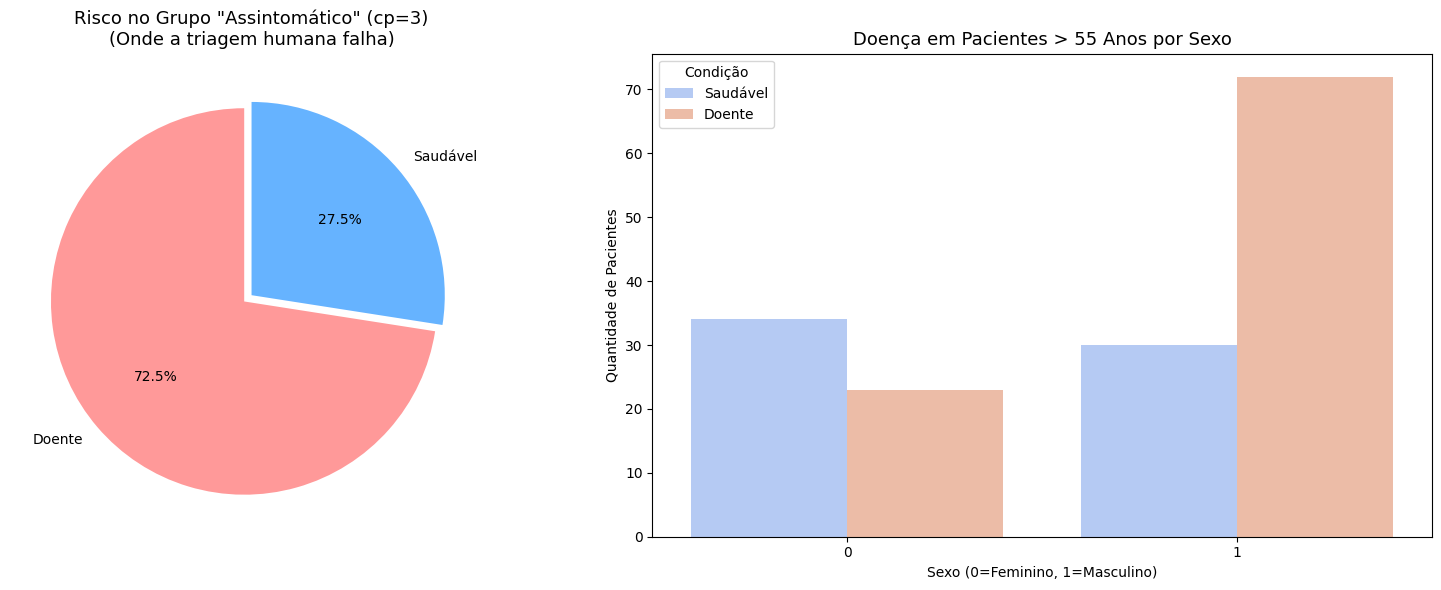

ESTATÍSTICA CHAVE:
De todos os pacientes classificados como 'Assintomáticos', 72.5% tinham doença cardíaca.
Isso prova que a ausência de dor no peito NÃO descarta o risco neste contexto.


In [19]:
# Foco: Investigar onde a triagem humana costuma falhar

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- ANÁLISE A: O Perigo Silencioso (Pacientes Assintomáticos) ---
# No nosso mapeamento: cp=3 representa 'Assintomático'
# Desses que não sentem dor típica, quantos estão doentes?
subset_assintomatico = df[df['cp'] == 3]
counts_assin = subset_assintomatico['condition'].value_counts(normalize=True)

colors_risk = ['#ff9999','#66b3ff'] # Vermelho (Doente), Azul (Saudável)

axes[0].pie(counts_assin, labels=['Doente', 'Saudável'], autopct='%1.1f%%', 
            startangle=90, colors=colors_risk, explode=(0.05, 0))
axes[0].set_title('Risco no Grupo "Assintomático" (cp=3)\n(Onde a triagem humana falha)', fontsize=13)

# --- ANÁLISE B: Perfil de Risco por Idade (> 55 anos) ---
# Vamos ver se a idade avançada isoladamente é sentença de doença
corte_idade = 55
subset_idosos = df[df['age'] >= corte_idade]

sns.countplot(x='sex', hue='condition', data=subset_idosos, ax=axes[1], palette='coolwarm')
axes[1].set_title(f'Doença em Pacientes > {corte_idade} Anos por Sexo', fontsize=13)
axes[1].set_xlabel('Sexo (0=Feminino, 1=Masculino)')
axes[1].set_ylabel('Quantidade de Pacientes')
axes[1].legend(title='Condição', labels=['Saudável', 'Doente'])

plt.tight_layout()
plt.show()

# --- Estatísticas Textuais para o Relatório ---
taxa_doenca_assintomatico = subset_assintomatico['condition'].mean() * 100
print(f"ESTATÍSTICA CHAVE:")
print(f"De todos os pacientes classificados como 'Assintomáticos', {taxa_doenca_assintomatico:.1f}% tinham doença cardíaca.")
print("Isso prova que a ausência de dor no peito NÃO descarta o risco neste contexto.")

O "Paradoxo dos Assintomáticos"

A análise de subgrupos revelou o achado mais impactante deste estudo, desafiando o senso comum da triagem médica tradicional:

**1. O Dado Alarmante:**
* De todos os pacientes que chegaram sem dor típica no peito (classificados como `cp=3: Asymptomatic`), **72.5% foram diagnosticados com doença cardíaca**.
* Este é, proporcionalmente, o grupo de **maior risco** de todo o dataset, superando até mesmo aqueles que sentiam angina típica.

**2. Interpretação Clínica (Isquemia Silenciosa):**
* A ausência de dor não significa ausência de doença. Muitos desses pacientes podem sofrer de "Isquemia Silenciosa" (comum em diabéticos ou idosos) ou já possuem um histórico clínico que justificou o exame mesmo sem sintomas agudos.

**3. Justificativa para o Modelo de IA:**
* Uma triagem humana baseada primariamente na pergunta *"O senhor está sentindo dor no peito?"* falharia em detectar quase 3/4 desse grupo crítico.
* **Valor do Projeto:** Nosso modelo é capaz de identificar esses pacientes cruzando dados "invisíveis" a olho nu (como a depressão do segmento ST e a frequência cardíaca máxima), salvando vidas que seriam liberadas precocemente em uma triagem padrão.

## 7. Conclusão e Próximos Passos
A Análise Exploratória de Dados (EDA) validou a qualidade do dataset e revelou os padrões ocultos que guiarão a construção ddo nosso modelo.

### 7.1 Principais Achados (Resumo Executivo)

1.  **A Justificativa do Projeto (O "Paradoxo dos Assintomáticos"):**
    * Identificamos que **72.5%** dos pacientes que chegaram à triagem *sem dor no peito* (assintomáticos) estavam, na verdade, doentes.
    * Isso prova que triagens baseadas apenas em sintomas visíveis são insuficientes. Nosso modelo é necessário para cruzar dados fisiológicos invisíveis a olho nu.

2.  **Os Pilares da Predição (Features "Locomotivas"):**
    * Os testes estatísticos confirmaram que as variáveis de **Esforço Físico** (`oldpeak`, `thalach`, `exang`) e **Anatomia** (`ca`, `thal`) são os discriminadores mais poderosos da doença.
    * Destaque para a **Depressão do Segmento ST (`oldpeak`)**, que separa visual e estatisticamente os pacientes saudáveis dos críticos.

3.  **O Que Não Funciona:**
    * A Glicemia de Jejum (`fbs`) apresentou p-valor de 1.00, indicando nulidade estatística neste dataset de emergência. Ela será mantida sob vigilância, mas é forte candidata a corte.

### 7.2 Próximos Passos (Roadmap para Modelagem)

Com o diagnóstico dos dados concluído, avançaremos para o notebook `02_pre_processamento_e_modelagem.ipynb` com as seguintes diretrizes:

1.  **Pré-Processamento:**
    * Transformar variáveis categóricas (`cp`, `thal`, `slope`) usando *One-Hot Encoding*.
    * Normalizar as variáveis numéricas (`age`, `thalach`, `chol`) para garantir que o modelo não dê peso excessivo apenas aos números maiores.

2.  **Seleção de Modelo:**
    * Dada a importância de variáveis com limiares claros (como `thalach < 150` ou `oldpeak > 1.0`), modelos baseados em árvore (**Decision Tree** e **Random Forest**) são os candidatos ideais, pois capturam essas regras de "se/então" com naturalidade.

3.  **Métrica de Sucesso:**
    * Nosso foco será maximizar o **Recall (Sensibilidade)**. No contexto médico, o erro mais grave é mandar um paciente doente para casa (Falso Negativo).